In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
#For some Statistics
from scipy.stats import norm, skew
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, recall_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score
#from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
import pickle

C:\Users\ritesh.kankonkar\AppData\Local\Continuum\anaconda2\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Let's import the set
pd.set_option('display.max_columns', 80)
df = pd.read_csv('criminal_train.csv')
df.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,4,1,1,1,2,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,1,1,1,1,1,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,1,1,2,1,1,1,2,1,2,1,99,9,2,2,1,1,1,1,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,2,1,2,1,2,1,99,9,7,7,1,1,2,3,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,1,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,2,2,2,2,2,2,1518.118526,40001,2,0


Random  over samplinng
0    42543
1     9000
Name: Criminal, dtype: int64


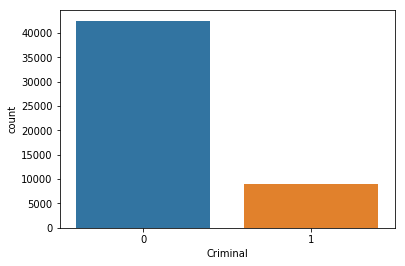

In [3]:
#the data is quite clean and needs minimal preprocessing.
#class imbalance is of 6% which greatly affects the model performance and hence we will try to over sample the data
# from 6% we will raise class 1 to almost 20%. Too much data could be overfitted and too less could be generalised as class 0

#2 dataframes divided by classes
df_class_0 = df[df['Criminal'] == 0]
df_class_1 = df[df['Criminal'] == 1]

#create a over sample of class 1
df_class_1_over = df_class_1.sample(9000, replace=True)

df_over = pd.concat([df_class_1_over, df_class_0], axis=0)

print ('Random  over samplinng')
print (df_over['Criminal'].value_counts())

sns.countplot(df_over['Criminal'])

In [4]:
#Since this is a final model, we will be fitting all of the data and evaluation can be done on the online evaluation.
#Earlier modelling have been done with trian and error with train_test_split.
#There is no sense in fitting the model on the entire dataset and then evaluate it against the same sample dataset, however, it can be done for understanding how well have we performed.

X = df_over.drop(['PERID', 'Criminal'], axis=1)

y = df_over['Criminal']

#sc = StandardScaler()
#X = sc.fit_transform(X)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [5]:
#we will be using Gradient Boosting method as it has proved to be ferforming well in the past trial and errors.

#gb = GradientBoostingClassifier(n_estimators=100, max_depth=3)
#gb.fit(X, y)

#ada_boost = AdaBoostClassifier()
#ada_boost.fit(X, y)

gboost = GradientBoostingClassifier(max_depth=3, n_estimators=250)
gboost.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [7]:

#xpred = xgb.predict(X_test)
#matthews_corrcoef(y_test, xpred)

#ada_pred = ada_boost.predict(X_test)
#matthews_corrcoef(y_test, ada_pred)

#gpred = gboost.predict(X_test)
#matthews_corrcoef(y_test, gpred)

In [26]:
#predicting and saving our results

test = pd.read_csv('criminal_test.csv')
PERID = test.PERID
test = test.drop(['PERID'], axis=1)

new1 = test.drop(['ANALWT_C', 'VESTR', 'NRCH17_2', 'IRHHSIZ2', 'IIHHSIZ2', 'IRKI17_2', 'IIKI17_2', 'IRHH65_2', 
                  'IIHH65_2', 'IRMCDCHP', 'IIMCDCHP', 'IRMEDICR', 'IIMEDICR', 'IRCHMPUS', 'IICHMPUS', 'IRPRVHLT', 'IIPRVHLT'], axis=1)

drop1 = test[['ANALWT_C', 'VESTR']]
#drop = sc.fit_transform(drop)


extras1 = test[['ANALWT_C', 'VESTR', 'NRCH17_2', 'IRHHSIZ2', 'IIHHSIZ2', 'IRKI17_2', 'IIKI17_2', 'IRHH65_2', 
                'IIHH65_2', 'IRMCDCHP', 'IIMCDCHP', 'IRMEDICR', 'IIMEDICR', 'IRCHMPUS', 'IICHMPUS', 'IRPRVHLT', 'IIPRVHLT']]

new1 = pd.get_dummies(new, drop_first=True)



test = pd.concat((new1, drop1, extras1), axis=1)

#test = sc.fit_transform(test)

test_pred = gboost.predict(test)
#test_pred = (test_pred > 0.6)
test_pred = pd.DataFrame(test_pred)


data = pd.concat([PERID, test_pred], axis=1)

data.to_csv('gboost.csv')

ValueError: Number of features of the model must match the input. Model n_features is 74 and input n_features is 72 